In [1]:
import geopandas
import contextily as cx
import warnings
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')

In [3]:
import data_pipeline.spatial_operations as so

In [4]:
import lib.standard_dataframe as sd

Running phoenix, 0 of 17
Neighborhoods before merge: 15
Neighborhoods after merge: 15
Population before merge: 1885933.0
Population after merge: 2579452.0


Running dallas, 1 of 17
Neighborhoods before merge: 14
Neighborhoods after merge: 14
Population before merge: 1840889.0
Population after merge: 2832169.0


Running detroit, 2 of 17
Neighborhoods before merge: 207
Neighborhoods after merge: 207
Population before merge: 844343.0
Population after merge: 2862987.0


Running los-angeles, 3 of 17
Neighborhoods before merge: 272
Neighborhoods after merge: 272
Population before merge: 10352220.0
Population after merge: 21679448.0


Running seattle, 4 of 17
Neighborhoods before merge: 119
Neighborhoods after merge: 119
Population before merge: 772529.0
Population after merge: 2998867.0


Running baltimore, 5 of 17
Neighborhoods before merge: 278
Neighborhoods after merge: 278
Population before merge: 723624.0
Population after merge: 3851808.0


Running austin, 6 of 17
Neighborhoods before m

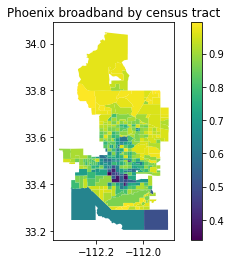

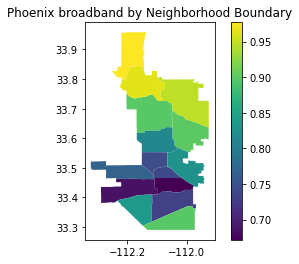

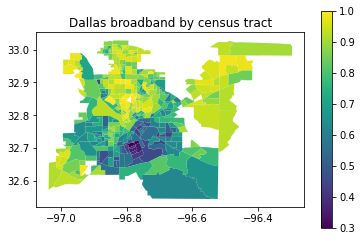

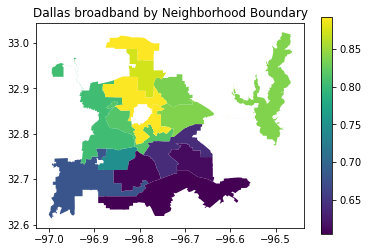

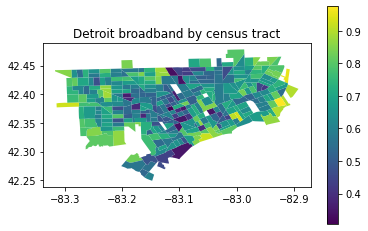

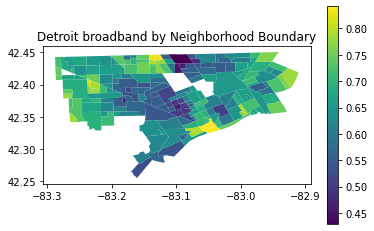

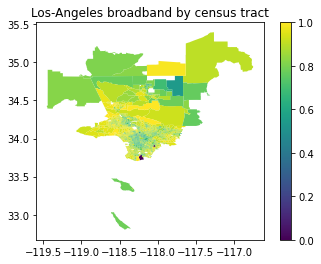

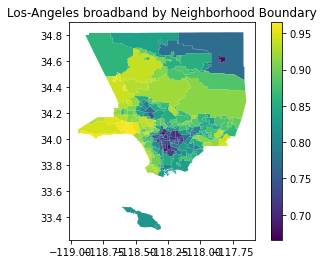

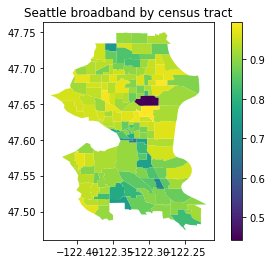

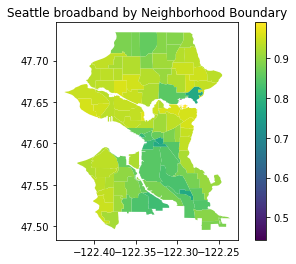

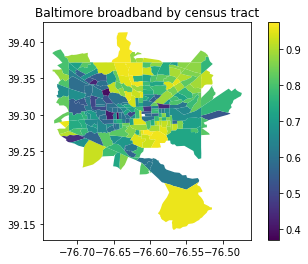

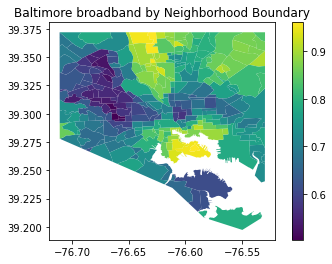

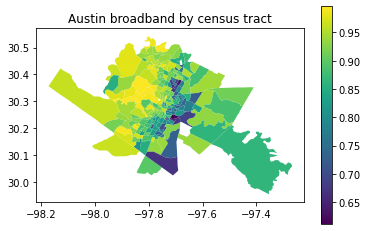

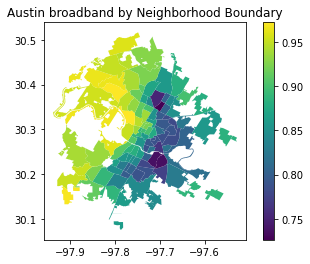

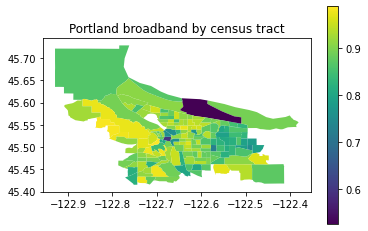

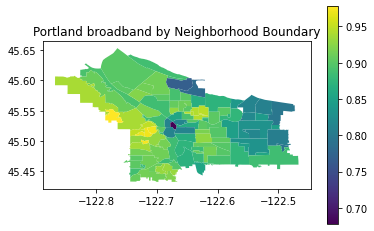

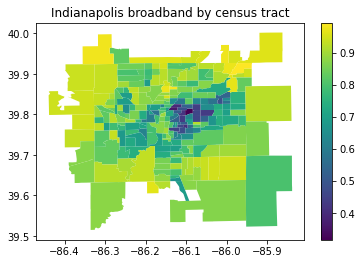

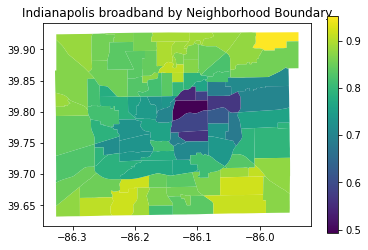

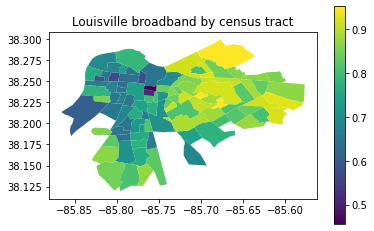

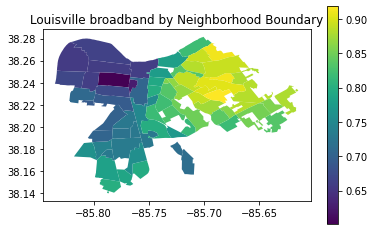

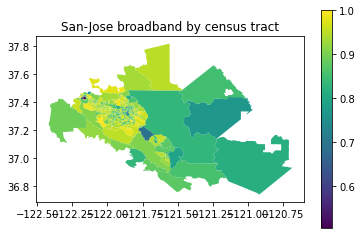

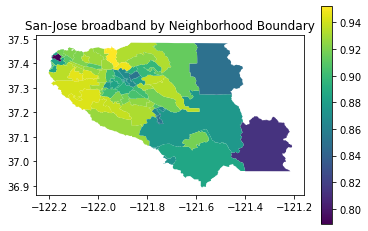

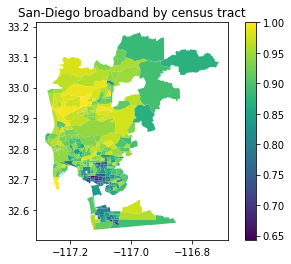

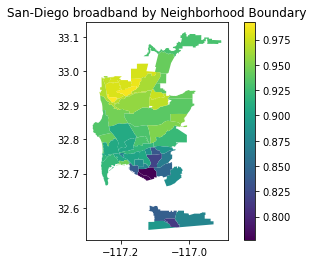

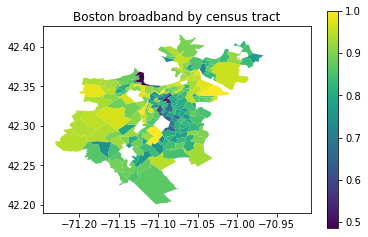

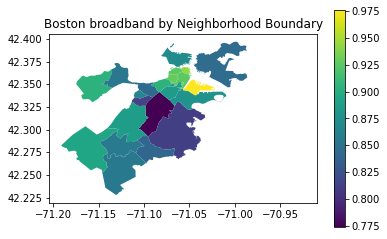

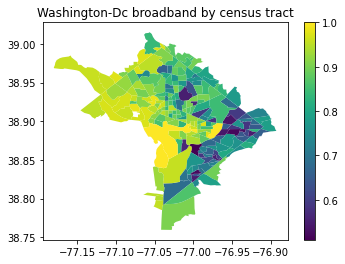

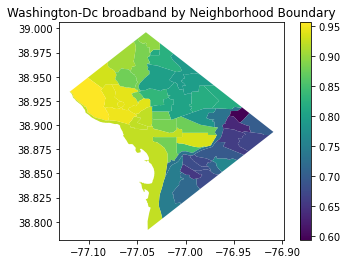

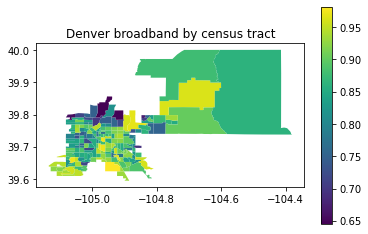

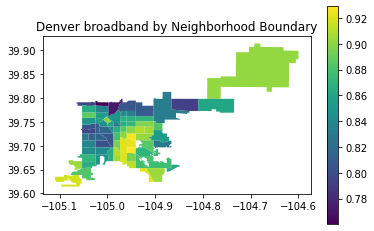

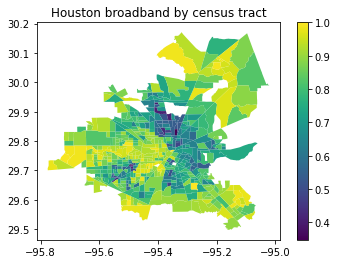

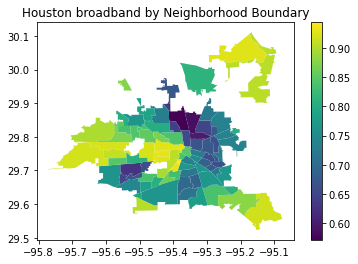

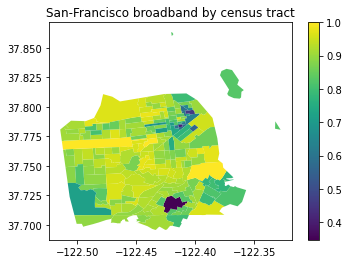

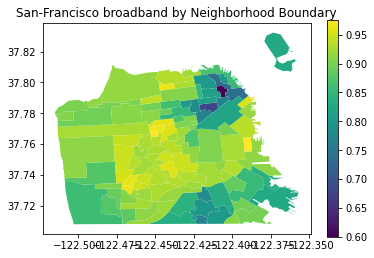

In [5]:
sd.generate_dataframe_and_plots()